# <center>Тема 1. Разведочный анализ данных</center>
## <center>Практическое задание. Анализ данных пассажиров "Титаника"</center>

In [291]:
import numpy as np
import pandas as pd
%matplotlib inline

Мы будем работать с данными [Titanic](https://www.kaggle.com/c/titanic): он содержит информацию о пассажирах корабля, включая их демографические характеристики и выжил пассажир или нет.

**Считаем данные из файла в память в виде объекта Pandas.DataFrame**

In [292]:
data = pd.read_csv('./titanic.csv',
                  index_col='PassengerId')

## Описание данных

**Обучающий набор содержит признак Survived для каждого пассажира, обозначающий, выжил данный пассажир или нет (0 для умерших, 1 для выживших).**

**Каждая строчка наборов данных содержит следующие поля:**

**Pclass — класс пассажира (1 — высший, 2 — средний, 3 — низший);**

**Name — имя;**

**Sex — пол;**

**Age — возраст;**

**SibSp — количество братьев, сестер, сводных братьев, сводных сестер, супругов на борту титаника;**

**Parch — количество родителей, детей (в том числе приемных) на борту титаника;**

**Ticket — номер билета;**

**Fare — плата за проезд;**

**Cabin — каюта;**

**Embarked — порт посадки (C — Шербур; Q — Квинстаун; S — Саутгемптон).**

**Вывести размер таблицы**

In [293]:
print("Размер таблицы (строки, столбцы):", data.shape)


Размер таблицы (строки, столбцы): (891, 11)


**Данные представлены в виде таблицы. Вывести первые 5 строк:**

In [294]:
print("Первые 5 строк данных:")
data.head()


Первые 5 строк данных:


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**Вывести описательную статистику**

In [295]:
print("Описательная статистика числовых данных:")
data.describe()

Описательная статистика числовых данных:


,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [296]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


**Определите, сколько пассажиров выжило, а сколько - нет?**

In [297]:
survived_counts = data['Survived'].value_counts()
print("Количество выживших и погибших:")
print(f"Выжило: {survived_counts[1]}")
print(f"Погибло: {survived_counts[0]}")

Количество выживших и погибших:
Выжило: 342
Погибло: 549


**Правда ли, что пассажиры более высокого класса имеют большие шансы на спасение?**

Для вычислений использовать groupby

In [298]:
sur_clss = data.groupby(['Pclass']).agg({'Survived':['size','sum','mean']})
print("Шансы на спасение в зависимости от класса (класс, всего мест, выжившие, шанс):")
sur_clss

Шансы на спасение в зависимости от класса (класс, всего мест, выжившие, шанс):


Survived               
           size  sum      mean
Pclass                        
1           216  136  0.629630
2           184   87  0.472826
3           491  119  0.242363

**Правда ли, что женщины имеют большие шансы на спасение?**

Для вычислений использовать groupby

In [299]:
survival_by_sex = data.groupby(['Sex']).agg({'Survived':['size','sum','mean']})
print("Шансы на спасение в зависимости от пола:")
survival_by_sex

Шансы на спасение в зависимости от пола:


Survived               
           size  sum      mean
Sex                           
female      314  233  0.742038
male        577  109  0.188908

**Cколько мужчин и женщин в каждом классе (Pclass)?**

Результаты представить в виде таблицы сопряженности.

In [300]:
sex_class_distribution = pd.crosstab(data['Pclass'], data['Sex'])
print("Распределение мужчин и женщин по классам:")
sex_class_distribution

Распределение мужчин и женщин по классам:


Sex,female,male
Pclass,,
1,94,122
2,76,108
3,144,347


**Вывести пассажиров, которые сели в Шербуре (Embarked=C) и заплатили более 200 у.е. за билет (fare > 200). Отсортировать этих пассажиров по убыванию платы за билет.**

In [301]:
cherbourg_high_fare = data[(data['Embarked'] == 'C') & (data['Fare'] > 200)].sort_values('Fare', ascending=False)
print("Пассажиры из Шербура, заплатившие более 200 у.е.:")
cherbourg_high_fare

Пассажиры из Шербура, заплатившие более 200 у.е.:


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C
312,1,1,"Ryerson, Miss. Emily Borie",female,18.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C
743,1,1,"Ryerson, Miss. Susan Parker ""Suzette""",female,21.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C
119,0,1,"Baxter, Mr. Quigg Edmond",male,24.0,0,1,PC 17558,247.5208,B58 B60,C
300,1,1,"Baxter, Mrs. James (Helene DeLaudeniere Chaput)",female,50.0,0,1,PC 17558,247.5208,B58 B60,C
381,1,1,"Bidois, Miss. Rosalie",female,42.0,0,0,PC 17757,227.5250,NaN,C
717,1,1,"Endres, Miss. Caroline Louise",female,38.0,0,0,PC 17757,227.5250,C45,C


**Создать категориальный признак для заданных градаций возраста пассажира.**

In [302]:
def age_category(age):
    if age < 30:
        return 1
    elif 30 <= age < 55:
        return 2
    else:
        return 3

In [303]:
data['AgeCategory'] = data['Age'].apply(age_category)
print("Добавлен категориальный признак возраста (AgeCategory).")
data.head()

Добавлен категориальный признак возраста (AgeCategory).


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeCategory
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,2


**Определить, сколько мужчин / женщин находилось на борту?**

In [304]:
sex_distribution = data['Sex'].value_counts()
print("Распределение пассажиров по полу:")
sex_distribution

Распределение пассажиров по полу:


Sex
male      577
female    314
Name: count, dtype: int64

**Выведите распределение переменной `Pclass` (социально-экономический статус) и это же распределение, только для мужчин / женщин по отдельности. Определить, сколько было мужчин 2-го класса**

Количество мужчин 2-го класса: 108


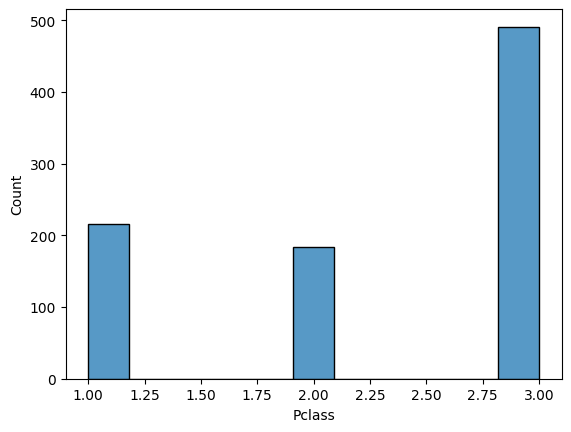

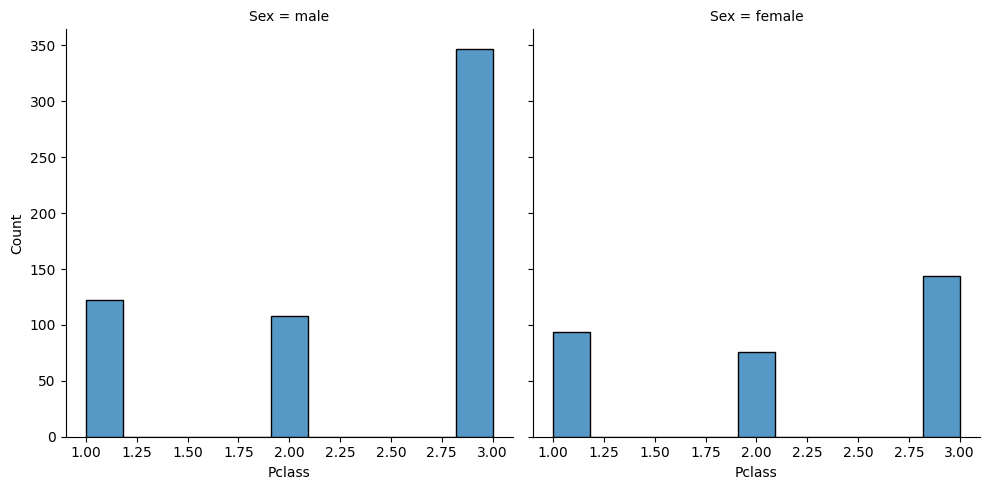

In [305]:
import seaborn as sns

sns.histplot(data["Pclass"])
sns.displot(data=data, x="Pclass", col="Sex")
print(f'Количество мужчин 2-го класса: {len(data[(data["Pclass"] == 2) & (data["Sex"] == "male")])}')

**Определите, какова доля выживших пассажиров из класса 3? А пассажиров из класса 1?**

In [306]:
survivor_class_data = data.groupby("Pclass").agg({"Survived":"sum"})
frst_cl = data[data['Pclass' ] == 1]
trd_cl = data[data['Pclass' ] == 3]

class_3 = round(survivor_class_data["Survived"][3] / len(trd_cl), 3)
class_1 = round(survivor_class_data["Survived"][1] / len(frst_cl), 3)
print(f'Доля выживших пассажиров класса 3: {class_3}, доля выживших пассажиров класса 1: {class_1}')

Доля выживших пассажиров класса 3: 0.242, доля выживших пассажиров класса 1: 0.63


**Определить медиану и стандартное отклонение платежей (`Fare`). Округлить до 2 десятичных знаков.**

In [307]:
fare_stats = data['Fare'].agg(['median', 'std'])
print("Медиана и стандартное отклонение платежей (Fare):")
fare_stats.round(2)

Медиана и стандартное отклонение платежей (Fare):


median    14.45
std       49.69
Name: Fare, dtype: float64

**Проверить, что люди моложе 30 лет выживают чаще, чем люди старше 60 лет. Определить доли выживших в обеих группах**

In [308]:
young_survival = data[data['Age'] < 30]['Survived'].mean()
old_survival = data[data['Age'] > 60]['Survived'].mean()

print(f'Доля выживших среди молодых пассажиров больше: {young_survival > old_survival}')


print("Доля выживших среди молодых (младше 30 лет):", young_survival)
print("Доля выживших среди пожилых (старше 60 лет):", old_survival)

Доля выживших среди молодых пассажиров больше: True
Доля выживших среди молодых (младше 30 лет): 0.40625
Доля выживших среди пожилых (старше 60 лет): 0.22727272727272727


**Проверить, что женщины выживают чаще мужчин. Определить доли выживших в обеих группах**

In [309]:
male_survival = data[data['Sex'] == 'male']['Survived'].mean()
female_survival = data[data['Sex'] == 'female']['Survived'].mean()

print(f'Доля выживших среди пассажиров женского пола больше: {female_survival > male_survival}')

print("Доля выживших среди мужчин:", male_survival)
print("Доля выживших среди женщин:", female_survival)

Доля выживших среди пассажиров женского пола больше: True
Доля выживших среди мужчин: 0.18890814558058924
Доля выживших среди женщин: 0.7420382165605095


**Найдите самое популярное имя среди пассажиров Титаника мужского пола**

In [310]:
names_list = []

for i in data["Name"]:
    first_name = [i.split()[2]]
    names_list += first_name

# увеличиваем id на 1, чтобы соответствовать исходной таблице
names_df = pd.DataFrame({"id":[i + 1 for i in range(len(names_list))],"firstName": names_list})
names_df = names_df.set_index("id")
data["firstName"] = names_df

# список мужских имен без повторений
unique_male_names = data[data["Sex"] == "male"]["firstName"].unique()

# количество раз, когда данное имя встречается в таблице
names_freq = []
for i in unique_male_names:
    names_freq += [(data["firstName"] == i).astype(int).sum()]

# поиск нужного имени
male_name_frequencies = pd.DataFrame({"name":unique_male_names, "count":names_freq})
male_name_frequencies = male_name_frequencies.set_index("name")
max_count = male_name_frequencies.max().iloc[0]
print(male_name_frequencies[male_name_frequencies["count"] == max_count])

         count
name          
William     48


**Определить, как отличается средний возраст мужчин / женщин в зависимости от класса обслуживания. Выберать верные утверждения:**
- &check; В среднем мужчины 1-го класса старше 40 лет
-  В среднем женщины 1-го класса старше 40 лет
- &check; Мужчины всех классов в среднем старше женщин того же класса
- &check; В среднем люди в 1 классе старше, чем во 2-ом, а те старше представителей 3-го класса

In [311]:
average_age_by_sex_class = data.groupby(['Sex', 'Pclass'])['Age'].mean()
print("Средний возраст мужчин и женщин по классам:")
average_age_by_sex_class

Средний возраст мужчин и женщин по классам:


Sex     Pclass
female  1         34.611765
        2         28.722973
        3         21.750000
male    1         41.281386
        2         30.740707
        3         26.507589
Name: Age, dtype: float64

**Визуализируйте пропуски**

Используем библиотеку `missingno`

<Axes: >

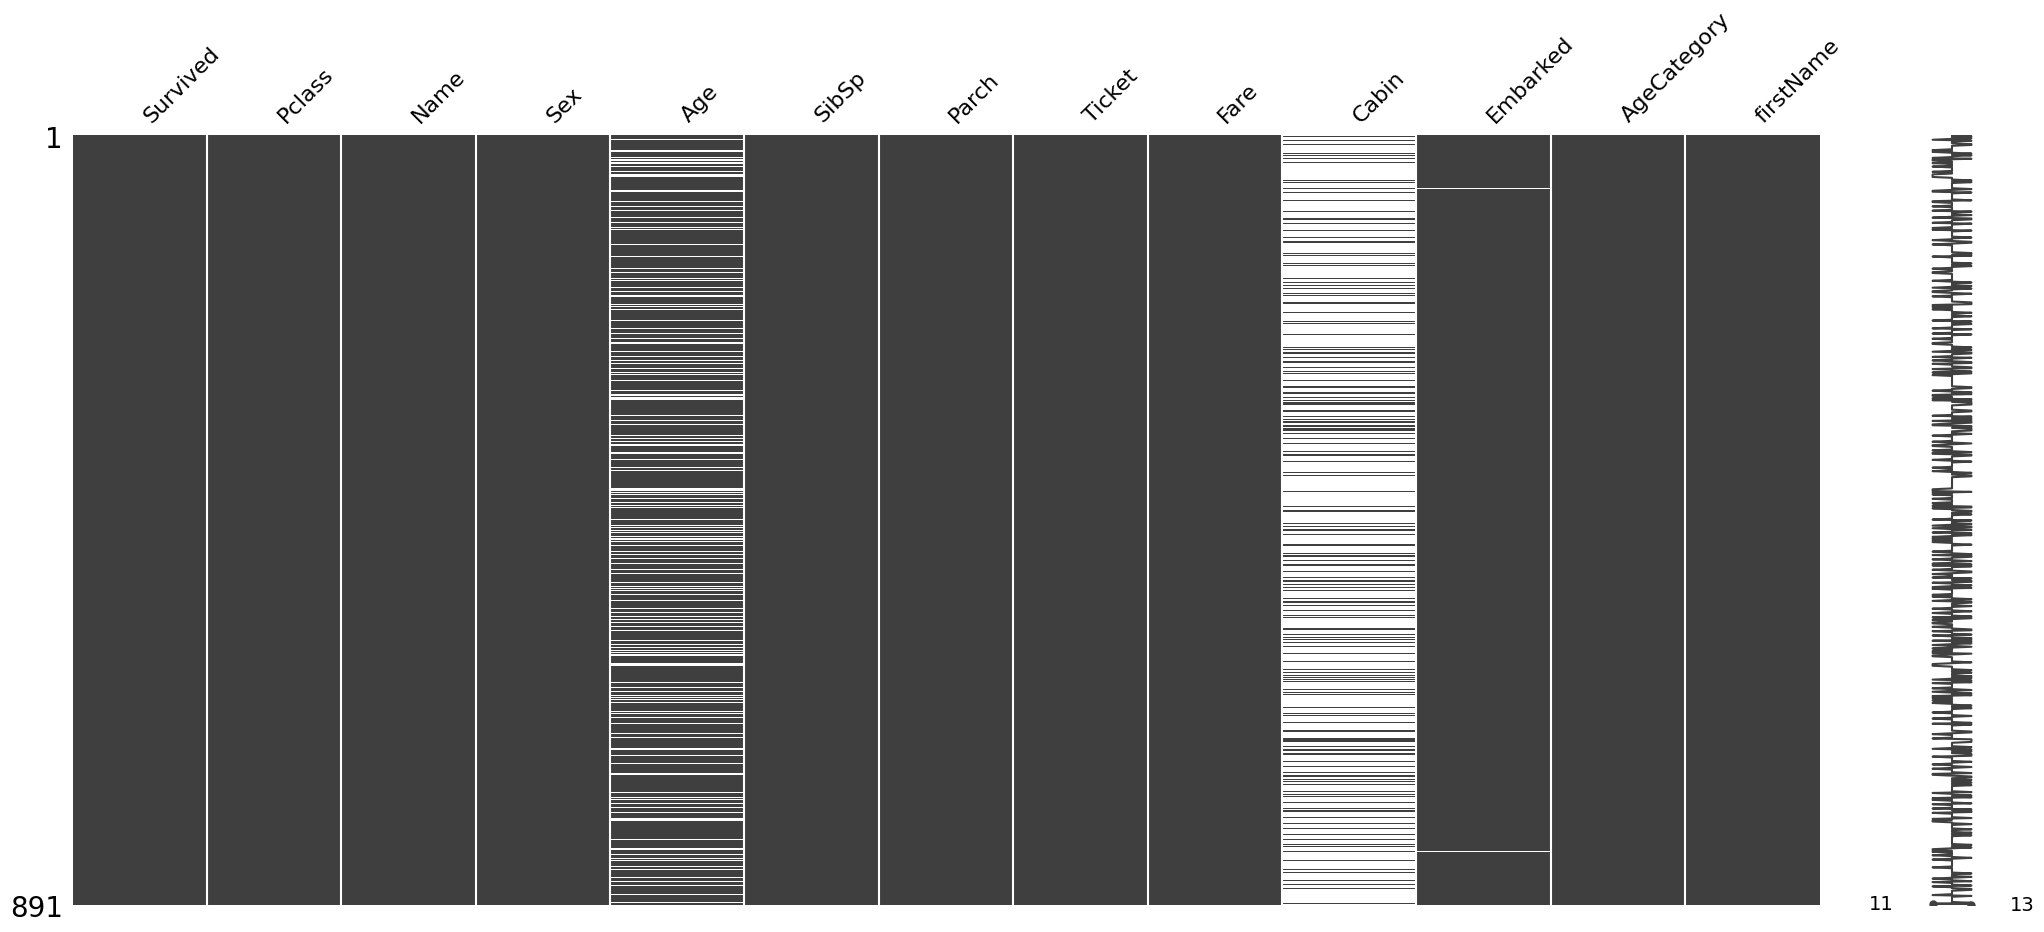

In [312]:
import missingno 
missingno.matrix(data)


**Выкинем признак Cabin. Столбец Age заполним медианным значением. Оставшиеся строки с пропусками удалим.**

C:\Users\sh764\AppData\Local\Temp\ipykernel_1320\3119854496.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  new_data["Age"].fillna(value=median, inplace=True)


<Axes: >

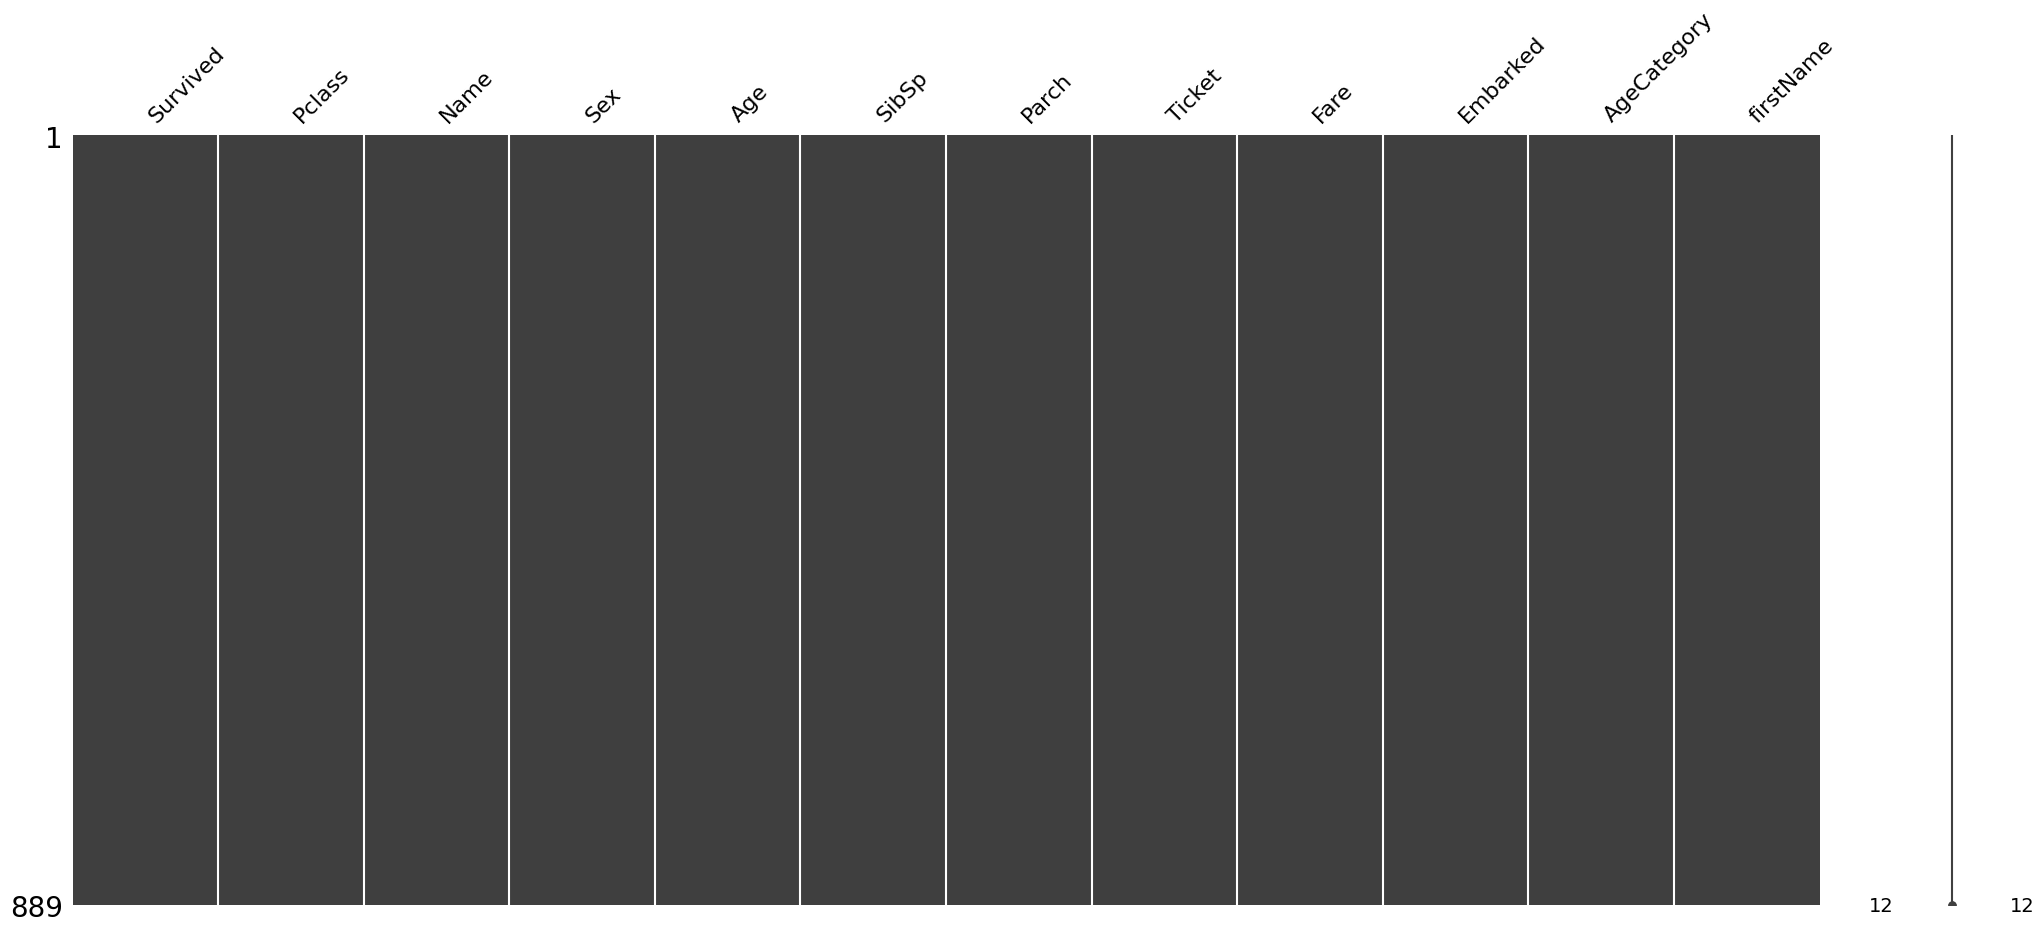

In [313]:
new_data = data.copy(deep=True)

new_data = new_data.drop(["Cabin"], axis=1)

median = new_data["Age"].quantile(0.5)

new_data["Age"].fillna(value=median, inplace=True)

new_data.dropna(how="any", inplace=True)

missingno.matrix(new_data)


**Для категориальных переменных построить столбчатую диаграмму**

<Axes: xlabel='Embarked', ylabel='Count'>

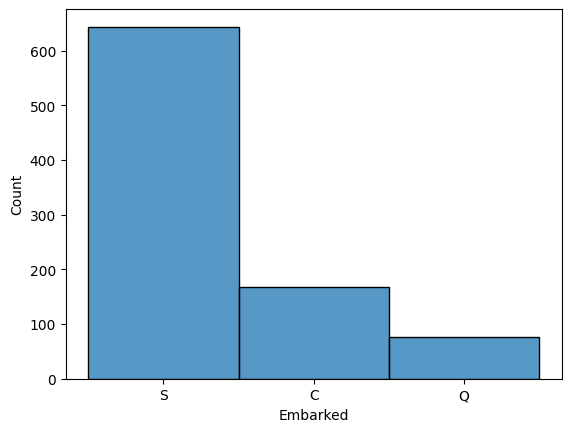

In [314]:
sns.histplot(data["Embarked"])



**Постройте попарные зависимости (диаграммы рассеяния) для признаков `Age`, `Fare`, `Pclass`, `Sex`, `SibSp`, `Parch`, `Embarked` и `Survived`. (метод `scatter_matrix ` Pandas или `pairplot` Seaborn).**

Попарные зависимости признаков:


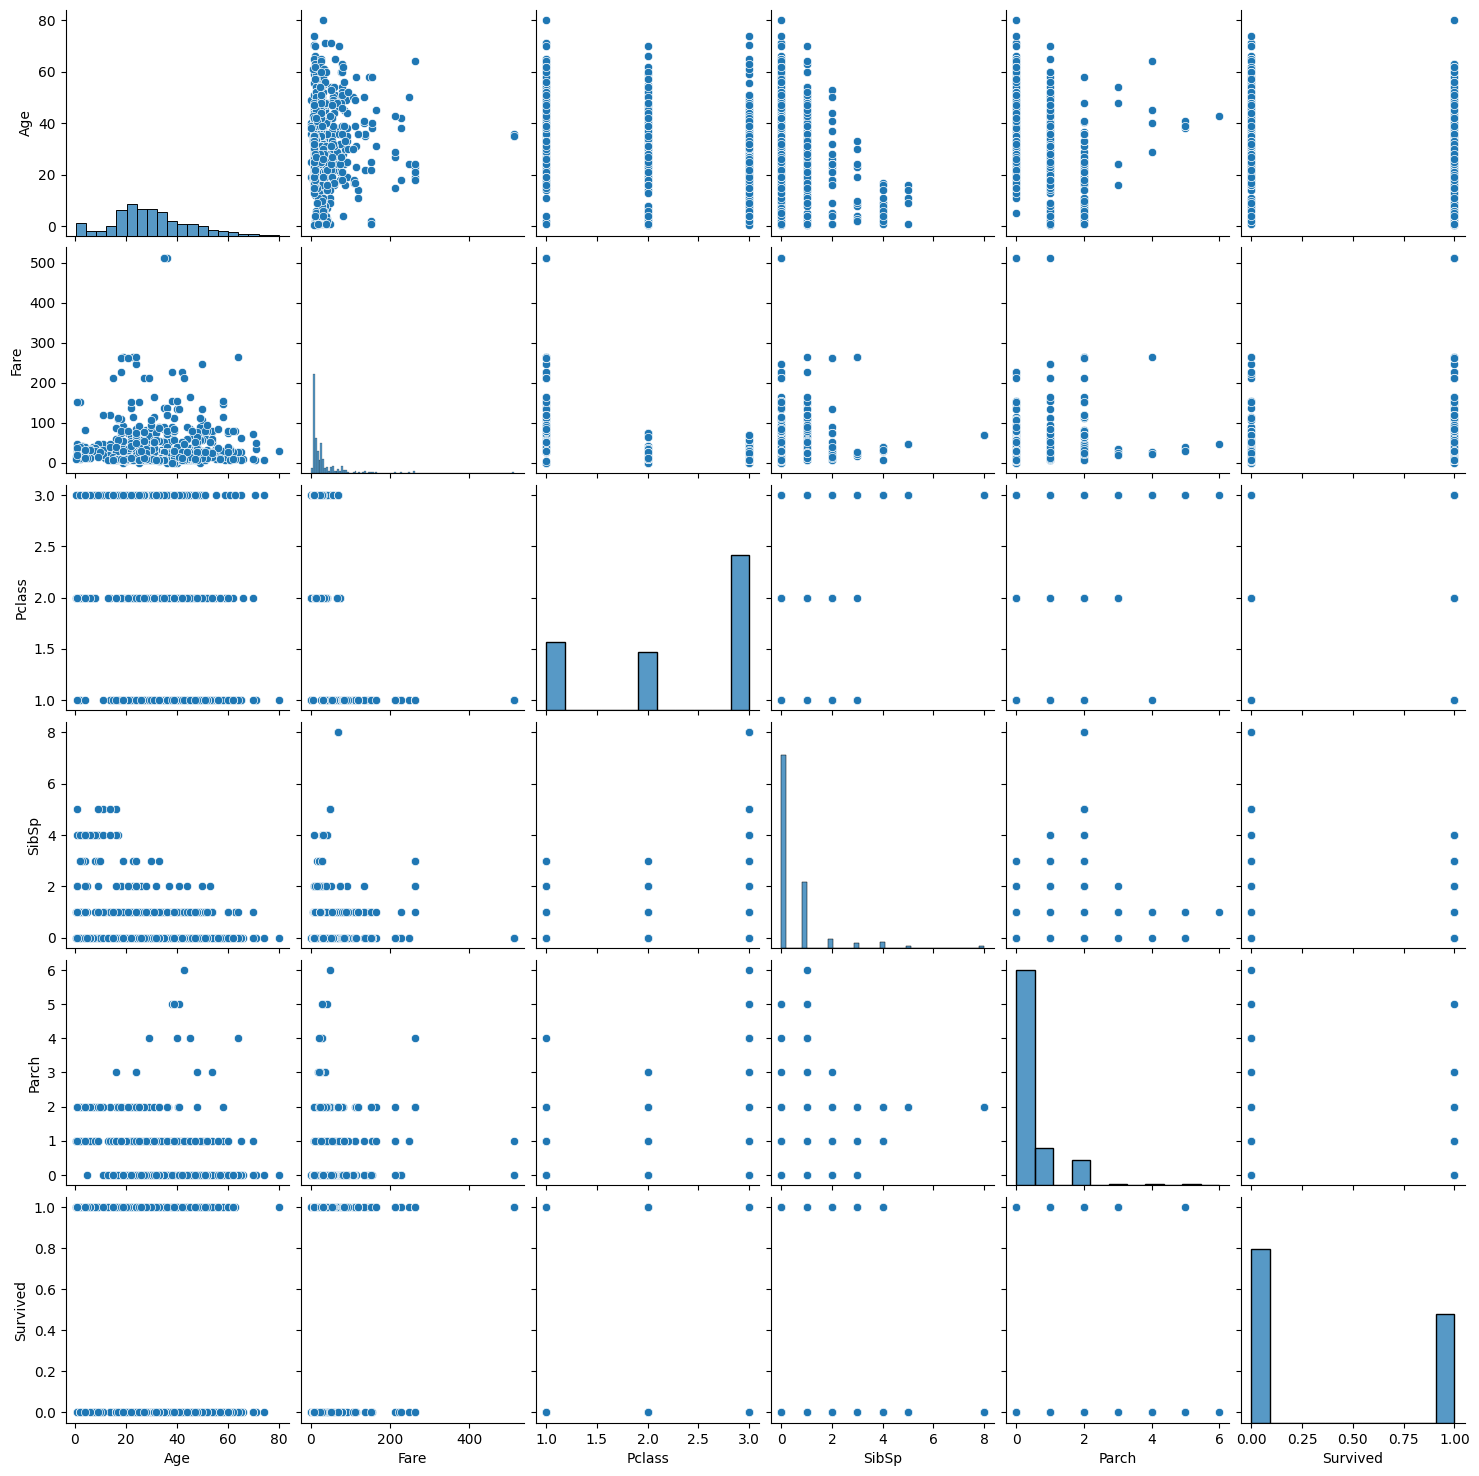

In [315]:
print("Попарные зависимости признаков:")
sns.pairplot(data[['Age', 'Fare', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked', 'Survived']])

**Как плата за билет (`Fare`) зависит от класса каюты (`Pclass`)? Постройте boxplot.**

<Axes: xlabel='Pclass', ylabel='Fare'>

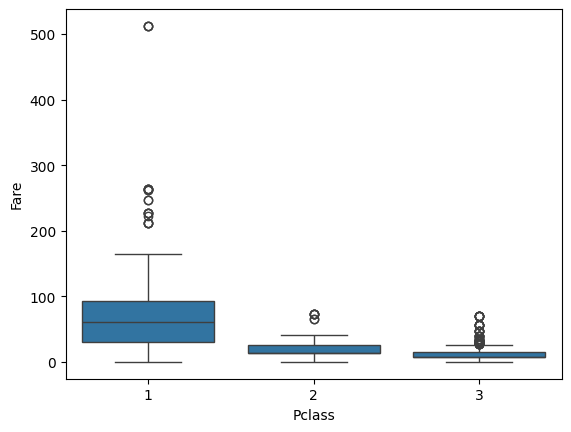

In [316]:
sns.boxplot(x='Pclass', y='Fare', data=data)


**Такой boxplot получается не очень красивым из-за выбросов.**

**Опционально: создайте признак Fare_no_out (стоимости без выбросов), в котором исключаются стоимости, отличающиеся от средней по классу более чем на 2 стандартных отклонения. Важно: надо исключать выбросы именно в зависимости от класса каюты. Иначе исключаться будут только самые большие (1 класс) и малые (3 класс) стоимости. Постройте boxplot.**

<Axes: xlabel='Pclass', ylabel='Fare_no_out'>

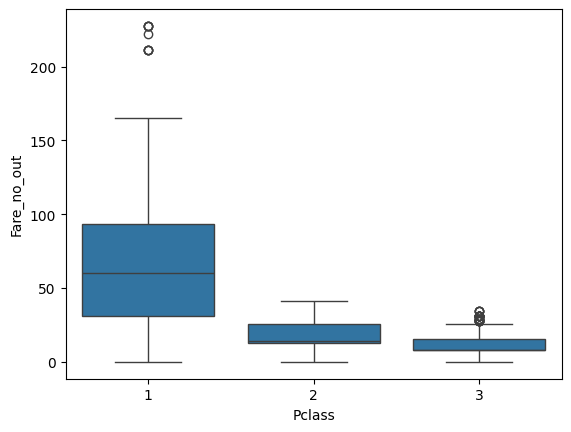

In [317]:
train_df = data.copy(deep=True)

train_df['Fare_no_out'] = train_df['Fare']

fare_pclass1 = train_df[train_df['Pclass'] == 1]['Fare']
fare_pclass2 = train_df[train_df['Pclass'] == 2]['Fare']
fare_pclass3 = train_df[train_df['Pclass'] == 3]['Fare']

max_pclass1 = fare_pclass1.mean() + fare_pclass1.std()
max_pclass2 = fare_pclass2.mean() + fare_pclass2.std()
max_pclass3 = fare_pclass3.mean() + fare_pclass3.std()

fare_pclass1_no_out = fare_pclass1.where(
  (fare_pclass1 - fare_pclass1.mean()) < 2 * fare_pclass1.std(), max_pclass1
)
fare_pclass2_no_out = fare_pclass2.where(
  (fare_pclass2 - fare_pclass2.mean()) < 2 * fare_pclass2.std(), max_pclass2
)
fare_pclass3_no_out = fare_pclass3.where(
  (fare_pclass3 - fare_pclass3.mean()) < 2 * fare_pclass3.std(), max_pclass3
)

train_df.loc[train_df['Pclass'] == 1, 'Fare_no_out'] = fare_pclass1_no_out
train_df.loc[train_df['Pclass'] == 2, 'Fare_no_out'] = fare_pclass2_no_out
train_df.loc[train_df['Pclass'] == 3, 'Fare_no_out'] = fare_pclass3_no_out

# выбросы все равно имеются, но их уже значительно меньше
sns.boxplot(x="Pclass", y="Fare_no_out", data=train_df)

**Каково соотношение погибших и выживших в зависимости от пола? Отобразите c помощью Seaborn.countplot (столбчатая диаграмма) c аргументом hue.**

<Axes: xlabel='Sex', ylabel='count'>

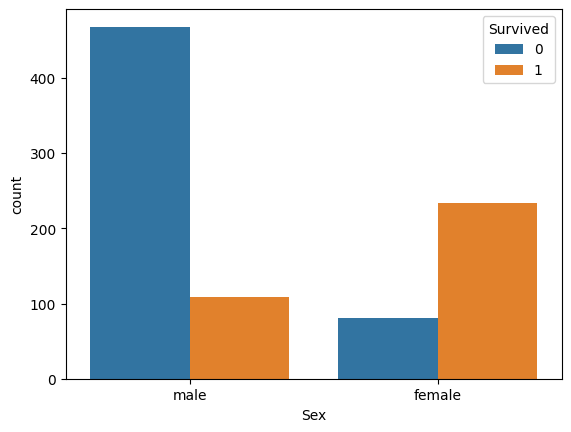

In [318]:
sns.countplot(x='Sex', hue='Survived', data=data)


**Каково соотношение погибших и выживших в зависимости от класса каюты? Отобразите c помощью Seaborn.countplot c аргументом hue.** 

<Axes: xlabel='Pclass', ylabel='count'>

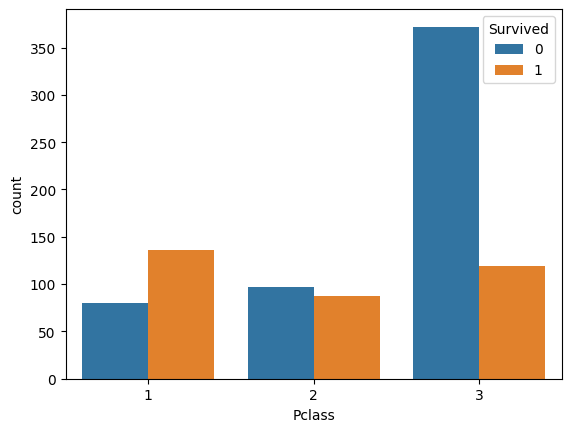

In [319]:
sns.countplot(x='Pclass', hue='Survived', data=data)


**Как факт выживания зависит от возраста пассажира? Проверьте (графически) предположение, что молодые чаще выживали. Пусть, условно, молодые - младше 30 лет, пожилые – старше 60 лет.**

<Axes: xlabel='AgeCategory', ylabel='percent'>

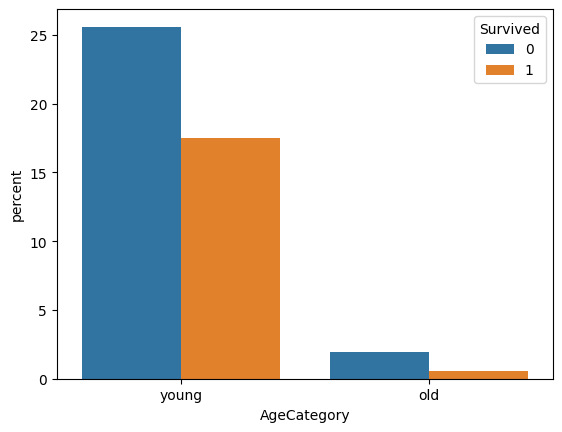

In [322]:
def age_classify(row):
    if row.Age < 30:
        return "young"
    elif row.Age > 60:
        return "old"

copy_data = data.copy(deep=True)
copy_data.drop(["AgeCategory"], axis=1, inplace=True)

copy_data["AgeCategory"] = (copy_data["Age"] > 60).astype(int) + (copy_data["Age"] < 30).astype(int)

age_data = copy_data.apply(age_classify, axis="columns")

copy_data["AgeCategory"] = age_data
sns.countplot(copy_data, x="AgeCategory", hue="Survived", stat="percent")

**Построить корреляционную матрицу. Выделить признаки, которые имень сильную корреляцию с целевой переменной**

In [329]:
copy_data = data.copy(deep=True)
copy_data.drop("AgeCategory", axis=1, inplace=True)

corr = copy_data.corr(numeric_only=True)

m = (corr.mask(np.eye(len(corr), dtype=bool)).abs() > 0.5).any()

raw = corr.loc[m, m]
raw.style.background_gradient(cmap='coolwarm')


,Pclass,Fare
Pclass,1.000000,-0.549500
Fare,-0.549500,1.000000
